# Pandas

- Pandas is a Python library used for working with data sets.
- It has functions for analyzing, cleaning, exploring, and manipulating data. 
- Pandas allows us to analyze big data and make conclusions based on statistical theories.
- Pandas can clean messy data sets, and make them readable and relevant.



In [1]:
import pandas as pd

Checking Pandas Version:

In [2]:
pd.__version__

'1.2.4'

In [3]:
mydataset = {
  'cars': ["BMW", "Volvo", "Ford"],
  'passings': [3, 7, 2]
}
mydataset

{'cars': ['BMW', 'Volvo', 'Ford'], 'passings': [3, 7, 2]}

In [4]:
myvar = pd.DataFrame(mydataset)
myvar

,cars,passings
0,BMW,3
1,Volvo,7
2,Ford,2


## Pandas Series

In [5]:
print(myvar.index.values)
len(myvar)

[0 1 2]


3

- A Pandas Series is like a column in a table.
- It is a one-dimensional array holding data of any type.

Example:

In [6]:
a = ["Ali", "Mohsen", "Mohammad"]

In [7]:
myvar = pd.Series(a)
myvar

0         Ali
1      Mohsen
2    Mohammad
dtype: object

In [8]:
myvar[0], myvar[2]

('Ali', 'Mohammad')

With the ```index``` argument, you can name your own labels.

In [9]:
myvar_new = pd.Series(a, index = ['x', 'y', 'z'])
myvar_new

x         Ali
y      Mohsen
z    Mohammad
dtype: object

In [10]:
myvar_new['x'], myvar_new[0]

('Ali', 'Ali')

In [11]:
calories = {'day1':1000, 'day2':800, 'day3':1200}

In [12]:
myvar = pd.Series(calories)
myvar

day1    1000
day2     800
day3    1200
dtype: int64

In [13]:
myvar = pd.Series(calories, index = ['day1', 'day2'])
myvar

day1    1000
day2     800
dtype: int64

In [14]:
myvar = pd.Series(calories, index = ['day1', 'day2'], name='workout')
myvar

day1    1000
day2     800
Name: workout, dtype: int64

## DataFrames

- Data sets in Pandas are usually multi-dimensional tables, called DataFrames.
- Series is like a column, a DataFrame is the whole table.

In [15]:
data = {
'calories': [1000, 1200, 800],
'duration': [30, 45, 20] 
}

In [16]:
df = pd.DataFrame(data)
df

,calories,duration
0,1000,30
1,1200,45
2,800,20


locate rows:

In [17]:
df.loc[0]

calories    1000
duration      30
Name: 0, dtype: int64

In [18]:
type(df.loc[0])

pandas.core.series.Series

In [19]:
df.loc[[0]]

,calories,duration
0,1000,30


In [20]:
type(df.loc[[0]])

pandas.core.frame.DataFrame

In [21]:
df.loc[[0,2]]

,calories,duration
0,1000,30
2,800,20


In [22]:
df = pd.DataFrame(data, index = ['day1', 'day2', 'day3'])
df

,calories,duration
day1,1000,30
day2,1200,45
day3,800,20


In [23]:
df.loc['day2']

calories    1200
duration      45
Name: day2, dtype: int64

### Series to DataFrame

In [24]:
myvar.to_frame()

,workout
day1,1000
day2,800


In [25]:
myvar.to_frame(name='newname')

,newname
day1,1000
day2,800


### DataFrame to Series

In [26]:
df['calories'].squeeze()

day1    1000
day2    1200
day3     800
Name: calories, dtype: int64

### Writing into a csv file:

In [27]:
df.to_csv('data.csv')
# df.to_csv('data.csv', index = False)

## Read CSV Files

A simple way to store big data sets is to use CSV files (comma separated files).

In [88]:
df = pd.read_csv('data.csv')

In [87]:
df

,Unnamed: 0,calories,duration
0,day1,1000,30
1,day2,1200,45
2,day3,800,20


### Remove `Unnamed: 0`

In [91]:
df_new =  pd.read_csv('data.csv', index_col=0)
df_new

,calories,duration
day1,1000,30
day2,1200,45
day3,800,20


print the entire DataFrame:

In [30]:
output = df.to_string()
output

'  Unnamed: 0  calories  duration\n0       day1      1000        30\n1       day2      1200        45\n2       day3       800        20'

In [31]:
print(output)

  Unnamed: 0  calories  duration
0       day1      1000        30
1       day2      1200        45
2       day3       800        20


In [32]:
df.index = ['ind_1', 'ind_2', 'ind_3']
df

,Unnamed: 0,calories,duration
ind_1,day1,1000,30
ind_2,day2,1200,45
ind_3,day3,800,20


In [33]:
df.columns = ['col_1', 'col_2', 'col_3']
df

,col_1,col_2,col_3
ind_1,day1,1000,30
ind_2,day2,1200,45
ind_3,day3,800,20


In [34]:
df.rename(columns={'col_2':'new_name'}, inplace=True)
df

,col_1,new_name,col_3
ind_1,day1,1000,30
ind_2,day2,1200,45
ind_3,day3,800,20


In [35]:
df = pd.read_csv('data.csv', names=['name1', 'name2', 'name3'])
df

,name1,name2,name3
0,NaN,calories,duration
1,day1,1000,30
2,day2,1200,45
3,day3,800,20


In [156]:
df = pd.read_csv('data.csv', names=['name1', 'name2', 'name3'], header=0)
df

,name1,name2,name3
0,day1,1000,30
1,day2,1200,45
2,day3,800,20


In [157]:
df.loc[0]
# df.iloc[0]

name1    day1
name2    1000
name3      30
Name: 0, dtype: object

In [162]:
df.loc[0,'name1']

'day1'

In [254]:
df.loc[0,]

Unnamed: 0    day1
calories      1000
duration        30
Name: 0, dtype: object

In [256]:
df.loc[1:2]

,Unnamed: 0,calories,duration
1,day2,1200,45
2,day3,800,20


In [257]:
df.loc[[1,2]]

,Unnamed: 0,calories,duration
1,day2,1200,45
2,day3,800,20


**Note:** 

- `df.loc[]` takes two positional arguments, the first one is the row and the second one is column! 
- We can skip the second argument but not the first one! **so `df.loc['name1']` does not work!**.
- If we do not specify the second argument, it will return all columns!
- `df.loc[[1,2]]` is simlar to `df.loc[1:2]` since `1:2` gives a list `[1,2]`. So, using `df.loc[[1:2]]` does not make sense!

In [38]:
df.loc[[0]]
# df.iloc[[0]]

,name1,name2,name3
0,day1,1000,30


## Analyzing DataFrames

### Viewing the Data

In [219]:
df = pd.read_csv('data.csv')
df

,Unnamed: 0,calories,duration
0,day1,1000,30
1,day2,1200,45
2,day3,800,20


#### Read Headers

In [292]:
df.columns

Index(['Unnamed: 0', 'calories', 'duration'], dtype='object')

In [293]:
list(df.columns)

['Unnamed: 0', 'calories', 'duration']

In [115]:
type(df.columns)

pandas.core.indexes.base.Index

In [116]:
df.columns[0]

'Unnamed: 0'

#### Read Columns  

Output is series

In [294]:
df['calories']
df.calories

0    1000
1    1200
2     800
Name: calories, dtype: int64

In [299]:
type(df.calories)

pandas.core.series.Series

Use `index` to obtain the name of rows:

In [296]:
df.calories.index

RangeIndex(start=0, stop=3, step=1)

In [129]:
[i for i in df.calories.index]

[0, 1, 2]

In [297]:
df.calories.index[1]

1

Use `list` to obtain the rows values

In [298]:
list(df.calories)

[1000, 1200, 800]

**Note:** `df.calories.index` and `df.columns` are generators!

In [140]:
range(1,10), [i for i in range(1,10)]

(range(1, 10), [1, 2, 3, 4, 5, 6, 7, 8, 9])

In [145]:
df.calories.index, [i for i in df.calories.index]

(RangeIndex(start=0, stop=3, step=1), [0, 1, 2])

In [146]:
df.columns, [i for i in df.columns]

(Index(['Unnamed: 0', 'calories', 'duration'], dtype='object'),
 ['Unnamed: 0', 'calories', 'duration'])

#### Read Each Row  

Output is DataFrame

In [259]:
df.iloc[0]
df.iloc[0:1]

,Unnamed: 0,calories,duration
0,day1,1000,30


### Differences Between `loc` and `iloc`

- `iloc` refers to integer location, `loc` refers to location.
- `iloc[a:b]` excludes b whereas `loc[a:b]` includes b. ***Why?*** *since according to Sarah `loc` specifically assign the locations and not the  row/column index*
- If the index have names, `loc[]` does not work with digits, e.g. `loc[0]`, but `iloc` does!

**Note:**
- When using `df.iloc[0]` or `df.loc[0]` we get `Series`
- When using `df.iloc[0:1]` or `df.loc[0:1]` we get `DataFrame`

In [47]:
df.iloc[0], type(df.iloc[0])

(Unnamed: 0    day1
 calories      1000
 duration        30
 Name: 0, dtype: object,
 pandas.core.series.Series)

In [59]:
df.iloc[0:1], type(df.iloc[0:1])

(  Unnamed: 0  calories  duration
 0       day1      1000        30,
 pandas.core.frame.DataFrame)

In [52]:
df.loc[0], type(df.loc[0])

(Unnamed: 0    day1
 calories      1000
 duration        30
 Name: 0, dtype: object,
 pandas.core.series.Series)

In [82]:
df.loc[0:1], type(df.loc[0:1])

(  Unnamed: 0  calories  duration
 0       day1      1000        30
 1       day2      1200        45,
 pandas.core.frame.DataFrame)

Another command for `df.iloc[0:2]`

In [102]:
df[0:2]

,Unnamed: 0,calories,duration
0,day1,1000,30
1,day2,1200,45


In [103]:
df.iloc[0:2]

,Unnamed: 0,calories,duration
0,day1,1000,30
1,day2,1200,45


**Note:** 
- `df[0]` or `df[0:2, 'colories']` does not work!
- `df[1:2]['calories']` works

#### Read Specific Location

In [81]:
df.iloc[2,1], type(df.iloc[2,1])

(800, numpy.int64)

In [80]:
df[1:2]['calories'], type(df[1:2]['calories'])

(1    1200
 Name: calories, dtype: int64,
 pandas.core.series.Series)

### Iterate through rows:

In [92]:
for index in df.index:
    for col in range(len(df.columns)):
        print(df.iloc[index,col], end=' ')
    print()

day1 1000 30 
day2 1200 45 
day3 800 20 


#### Another way:

In [94]:
for index in df.index:
    print(df.iloc[index:index + 1])

  Unnamed: 0  calories  duration
0       day1      1000        30
  Unnamed: 0  calories  duration
1       day2      1200        45
  Unnamed: 0  calories  duration
2       day3       800        20


#### Another way:


In [95]:
for index in df.index:
    print(df.iloc[index])

Unnamed: 0    day1
calories      1000
duration        30
Name: 0, dtype: object
Unnamed: 0    day2
calories      1200
duration        45
Name: 1, dtype: object
Unnamed: 0    day3
calories       800
duration        20
Name: 2, dtype: object


#### Another way:

When using `index, row = df.iterrows()`, in each iteration the `row` gives `df.loc[index]` which is a pandas `Series`!

In [106]:
for index, row in df.iterrows():
    print(index, row, end='\n----------------------\n')

0 Unnamed: 0    day1
calories      1000
duration        30
Name: 0, dtype: object
----------------------
1 Unnamed: 0    day2
calories      1200
duration        45
Name: 1, dtype: object
----------------------
2 Unnamed: 0    day3
calories       800
duration        20
Name: 2, dtype: object
----------------------


In [147]:
df.head(2)

,Unnamed: 0,calories,duration
0,day1,1000,30
1,day2,1200,45


In [203]:
df.tail(2)

,Unnamed: 0,calories,duration
1,day2,1200,45
2,day3,800,20


#### Masking the whole DataFrame

In [220]:
df.notnull()

,Unnamed: 0,calories,duration
0,True,True,True
1,True,True,True
2,True,True,True


In [222]:
df1 = df[df.notnull()]
df1

,Unnamed: 0,calories,duration
0,day1,1000,30
1,day2,1200,45
2,day3,800,20


In [223]:
df.isnull()

,Unnamed: 0,calories,duration
0,False,False,False
1,False,False,False
2,False,False,False


In [224]:
df2 = df[df.isnull()]
df2

,Unnamed: 0,calories,duration
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN


In [244]:
df_new = pd.DataFrame({'col1': [False, False, True], 
                      'calories': [False, False, True],
                      'col2': [False, False, True],})
df_new

,col1,calories,col2
0,False,False,False
1,False,False,False
2,True,True,True


**Note:** 

Here if we use `0`, `1`, they will not be considered as `Boolean`! So we can not do masking with `0`, `1`.

In [240]:
df[df_new]

,Unnamed: 0,calories,duration
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,800.0,NaN


### Filtering the data

In [172]:
df.loc[df.index == 1]

,Unnamed: 0,calories,duration
1,day2,1200,45


In [177]:
df.loc[df.index > 0]

,Unnamed: 0,calories,duration
1,day2,1200,45
2,day3,800,20


**Note:** Indeed, a *masking* occurs here:

In [238]:
df.loc[[False, True, True]]

,Unnamed: 0,calories,duration
1,day2,1200,45
2,day3,800,20


**Note:** Masking should be done with `True` and `Flase`and not `0`, `1`

In [239]:
df.loc[[0, 1, 1]]

,Unnamed: 0,calories,duration
0,day1,1000,30
1,day2,1200,45
1,day2,1200,45


In [237]:
df.loc[[0, 1, 1, 1, 2, 0]]

,Unnamed: 0,calories,duration
0,day1,1000,30
1,day2,1200,45
1,day2,1200,45
1,day2,1200,45
2,day3,800,20
0,day1,1000,30


In [178]:
df['calories'] == 1000

0     True
1    False
2    False
Name: calories, dtype: bool

In [182]:
df[['calories']] == 1000

,calories
0,True
1,False
2,False


In [191]:
df.loc[df['calories'] == 1000, 'duration']

0    30
Name: duration, dtype: int64

In [189]:
df.loc[df['calories'] == 1000, ['duration']]

,duration
0,30


In [192]:
df.loc[df['calories'] == 1000, ['duration', 'calories']]

,duration,calories
0,30,1000


In [193]:
pd.Series({0:True, 1:False, 2:False})

0     True
1    False
2    False
dtype: bool

In [35]:
df.loc[pd.Series({0:True, 1:False, 2:False})]

,Unnamed: 0,calories,duration
0,day1,1000,30


In [194]:
df.loc[df['calories'] == 1000]

,Unnamed: 0,calories,duration
0,day1,1000,30


In [199]:
df.isnull()

,Unnamed: 0,calories,duration
0,False,False,False
1,False,False,False
2,False,False,False


In [202]:
df[df.isnull()]

,Unnamed: 0,calories,duration
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN


In [196]:
df['calories'].isnull()

0    False
1    False
2    False
Name: calories, dtype: bool

In [250]:
df.loc[df['calories'].isnull()]

,Unnamed: 0,calories,duration


In [251]:
df.loc[(df['calories'] == 1000) & (df['duration'] == 45)]

,Unnamed: 0,calories,duration


In [248]:
df.loc[(df['calories'] == 1000) | (df['duration'] == 45)]

,Unnamed: 0,calories,duration
0,day1,1000,30
1,day2,1200,45


**Note:**

- We can **not** use `or`, `and` instead of `|`, `&`
- Using `( )` is a must to avoid mixing up with `1000 | df['duration']`

In [265]:
df.loc[df['calories'].isnull() | df['duration'].isnull()]

,Unnamed: 0,calories,duration


**Remember:**

In [268]:
'My name'.upper()

'MY NAME'

In [270]:
df['Unnamed: 0']

0    day1
1    day2
2    day3
Name: Unnamed: 0, dtype: object

In [276]:
df['Unnamed: 0'].str.split('a')

0    [d, y1]
1    [d, y2]
2    [d, y3]
Name: Unnamed: 0, dtype: object

**Note:** 

- `Series.str` is used to ***vectorize*** string functions for Series and Index

In [277]:
~df['Unnamed: 0'].str.contains('day')

0    False
1    False
2    False
Name: Unnamed: 0, dtype: bool

In [279]:
df.loc[~df['Unnamed: 0'].str.contains('day')]

,Unnamed: 0,calories,duration


In [280]:
df.loc[df['Unnamed: 0'].str.contains('day1|day2')]

,Unnamed: 0,calories,duration
0,day1,1000,30
1,day2,1200,45


In [281]:
df.loc[df['Unnamed: 0'].str.contains('a[a-z]*')]

,Unnamed: 0,calories,duration
0,day1,1000,30
1,day2,1200,45
2,day3,800,20


In [282]:
df.loc[df['Unnamed: 0'].str.contains('^a[a-z]*')] # 'a' starts first of the word 

,Unnamed: 0,calories,duration


In [286]:
df.loc[df['Unnamed: 0'].str.contains('d[a-z][a-z][1-9]')]

,Unnamed: 0,calories,duration
0,day1,1000,30
1,day2,1200,45
2,day3,800,20


In [291]:
df.loc[df['Unnamed: 0'].str.contains('d[a-z][a-z][2]')]

,Unnamed: 0,calories,duration
1,day2,1200,45


Pick some columns:

In [301]:
cols = list(df.columns)
cols

['Unnamed: 0', 'calories', 'duration']

In [326]:
df[[cols[0]]]

,Unnamed: 0
0,day1
1,day2
2,day3


In [327]:
df[cols[2:3]]

,duration
0,30
1,45
2,20


In [328]:
df[[cols[0]]+cols[2:3]]

,Unnamed: 0,duration
0,day1,30
1,day2,45
2,day3,20


**Note:** `df[cols[1]+cols[2:3]]` is not working, since slicing `cols[2:3]` gives a list but `cols[1]` is not a list. Therefore we have to use `[cols[0]]` to obtain a list!

Dimensionality Reduction Example:

In [341]:
df

,Unnamed: 0,calories,duration
0,day1,1000,30
1,day2,1200,45
2,day3,800,20


For example, the PCA gives the a list `[10, 3, 0]` of coefficient for each columns:

In [335]:
coef = pd.Series([10, 3, 0], index = df.columns)
coef

Unnamed: 0    10
calories       3
duration       0
dtype: int64

We need a DataFrame whose columns' coef is not zero!

In [339]:
coef[coef != 0]

Unnamed: 0    10
calories       3
dtype: int64

In [340]:
df[coef[coef != 0].index]

,Unnamed: 0,calories
0,day1,1000
1,day2,1200
2,day3,800


### Info About the Data

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3 non-null      object
 1   calories    3 non-null      int64 
 2   duration    3 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 200.0+ bytes


In [882]:
df.describe()

,calories,duration
count,3.0,3.000000
mean,1000.0,31.666667
std,200.0,12.583057
min,800.0,20.000000
25%,900.0,25.000000
50%,1000.0,30.000000
75%,1100.0,37.500000
max,1200.0,45.000000


In [883]:
df.sort_values('calories', ascending = False)

,Unnamed: 0,calories,duration
1,day2,1200,45
0,day1,1000,30
2,day3,800,20


## Cleaning Data

Data cleaning means fixing bad data in your data set.

Bad data could be:
- empty cells
- data in wrong format
- wrong data
- duplicates

In [884]:
df = pd.read_csv('dataW3schools.csv')

In [885]:
df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


### Remove rows that contain empty cells

In [886]:
new_df = df.dropna()
new_df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


Reset indices:

In [887]:
# old indices are shown as a new column
new_df.reset_index()

,index,Duration,Pulse,Maxpulse,Calories
0,0,60,110,130,409.1
1,1,60,117,145,479.0
2,2,60,103,135,340.0
3,3,45,109,175,282.4
4,4,45,117,148,406.0
...,...,...,...,...,...
159,164,60,105,140,290.8
160,165,60,110,145,300.0
161,166,60,115,145,310.2
162,167,75,120,150,320.4


In [888]:
# get rid of old indices
new_df.reset_index(drop = True)

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
159,60,105,140,290.8
160,60,110,145,300.0
161,60,115,145,310.2
162,75,120,150,320.4


### Replace empty values

In [889]:
new_df = df.fillna(130)
new_df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


### Replace Only For a Specified Columns

In [890]:
df["Calories"].fillna(130)

0      409.1
1      479.0
2      340.0
3      282.4
4      406.0
       ...  
164    290.8
165    300.0
166    310.2
167    320.4
168    330.4
Name: Calories, Length: 169, dtype: float64

### Replace Using Mean, Median, or Mode

A common way to replace empty cells, is to calculate the ```mean()```, ```median()``` or ```mode()``` value of the column.

In [891]:
x = df['Calories'].mean()
# x = df["Calories"].median()
# x = df["Calories"].mode()[0]

In [892]:
df["Calories"].fillna(x)

0      409.1
1      479.0
2      340.0
3      282.4
4      406.0
       ...  
164    290.8
165    300.0
166    310.2
167    320.4
168    330.4
Name: Calories, Length: 169, dtype: float64

### Removing Rows

Remove rows with a NULL value in a specific column:

In [893]:
df.dropna(subset = ['Calories'])

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


### Fixing Wrong Data

#### Replacing Values

In [894]:
df.loc[7, 'Duration'] = 45

In [895]:
for x in df.index:
    if df.loc[x, 'Duration'] > 120:
        df.loc[x, 'Duration'] = 120

#### Removing Rows

In [896]:
for x in df.index:
    if df.loc[x, 'Duration'] > 120:
        df.drop(x, inplace = True) # inplace used to overwrite

### Discovering Duplicates

In [897]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
164    False
165    False
166    False
167    False
168    False
Length: 169, dtype: bool

In [898]:
for i in df.duplicated().index:
    if df.duplicated()[i] == True:
        print(i)

36
37
38
40
71
113
155


### Removing Duplicates

In [899]:
df.drop_duplicates(inplace = True)

## Data Correlations

The ```corr()``` method calculates the relationship between each column in your data set.

- perfect correlation: 1.0
- good correlation: 0.9
- bad correlation: 0.09
- -0.9 would be just as good relationship as 0.9, but if you increase one value, the other will probably go down.

The ```corr()``` method ignores "not numeric" columns.

In [900]:
df.corr()

,Duration,Pulse,Maxpulse,Calories
Duration,1.000000,-0.245729,-0.081582,0.820359
Pulse,-0.245729,1.000000,0.787035,0.015301
Maxpulse,-0.081582,0.787035,1.000000,0.195309
Calories,0.820359,0.015301,0.195309,1.000000


## Plotting

In [901]:
import matplotlib.pyplot as plt

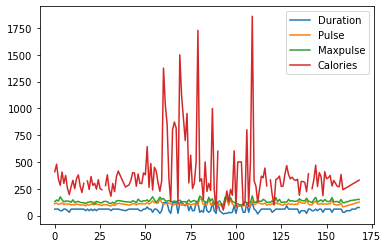

In [902]:
df.plot()
plt.show()

### Scatter:

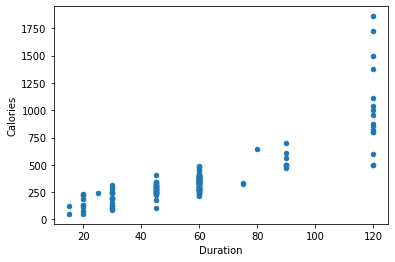

In [903]:
df.plot(kind = 'scatter', x = 'Duration', y = 'Calories')
plt.show()

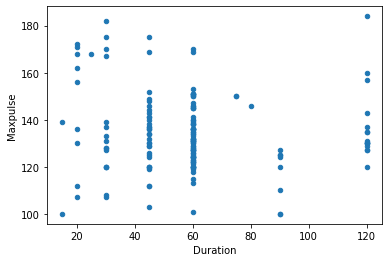

In [904]:
df.plot(kind = 'scatter', x = 'Duration', y = 'Maxpulse')
plt.show()

**Note**: you can conclude the bad ad good correlations from scatter plot!

### Histogram

<AxesSubplot:ylabel='Frequency'>

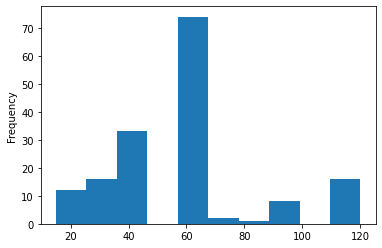

In [905]:
df['Duration'].plot(kind = 'hist')

## Making changes to the data

In [906]:
df['total'] = 0
for col in ['Duration', 'Calories']:
    df['total'] += df[col]

In [907]:
df

,Duration,Pulse,Maxpulse,Calories,total
0,60,110,130,409.1,469.1
1,60,117,145,479.0,539.0
2,60,103,135,340.0,400.0
3,45,109,175,282.4,327.4
4,45,117,148,406.0,451.0
...,...,...,...,...,...
164,60,105,140,290.8,350.8
165,60,110,145,300.0,360.0
166,60,115,145,310.2,370.2
167,75,120,150,320.4,395.4


In [908]:
df['Total'] = df.iloc[:, 1:4].sum(axis=1)

In [909]:
df

,Duration,Pulse,Maxpulse,Calories,total,Total
0,60,110,130,409.1,469.1,649.1
1,60,117,145,479.0,539.0,741.0
2,60,103,135,340.0,400.0,578.0
3,45,109,175,282.4,327.4,566.4
4,45,117,148,406.0,451.0,671.0
...,...,...,...,...,...,...
164,60,105,140,290.8,350.8,535.8
165,60,110,145,300.0,360.0,555.0
166,60,115,145,310.2,370.2,570.2
167,75,120,150,320.4,395.4,590.4


In [910]:
df['TOTAL'] = 0
#cols = ['Duration', 'Pulse', 'Maxpulse, 'Calories', total', 'Total']
cols = df.columns
df['TOTAL'] = df[cols[:]].sum(axis=1)
df

,Duration,Pulse,Maxpulse,Calories,total,Total,TOTAL
0,60,110,130,409.1,469.1,649.1,1827.3
1,60,117,145,479.0,539.0,741.0,2081.0
2,60,103,135,340.0,400.0,578.0,1616.0
3,45,109,175,282.4,327.4,566.4,1505.2
4,45,117,148,406.0,451.0,671.0,1838.0
...,...,...,...,...,...,...,...
164,60,105,140,290.8,350.8,535.8,1482.4
165,60,110,145,300.0,360.0,555.0,1530.0
166,60,115,145,310.2,370.2,570.2,1570.6
167,75,120,150,320.4,395.4,590.4,1651.2


In [911]:
df

,Duration,Pulse,Maxpulse,Calories,total,Total,TOTAL
0,60,110,130,409.1,469.1,649.1,1827.3
1,60,117,145,479.0,539.0,741.0,2081.0
2,60,103,135,340.0,400.0,578.0,1616.0
3,45,109,175,282.4,327.4,566.4,1505.2
4,45,117,148,406.0,451.0,671.0,1838.0
...,...,...,...,...,...,...,...
164,60,105,140,290.8,350.8,535.8,1482.4
165,60,110,145,300.0,360.0,555.0,1530.0
166,60,115,145,310.2,370.2,570.2,1570.6
167,75,120,150,320.4,395.4,590.4,1651.2


## Conditional Changes

In [914]:
df.loc[df['Duration'] == 45, 'TOTAL'] = 99999

In [915]:
df

,Duration,Pulse,Maxpulse,Calories,total,Total,TOTAL
0,60,110,130,409.1,469.1,649.1,1827.3
1,60,117,145,479.0,539.0,741.0,2081.0
2,60,103,135,340.0,400.0,578.0,1616.0
3,45,109,175,282.4,327.4,566.4,99999
4,45,117,148,406.0,451.0,671.0,99999
...,...,...,...,...,...,...,...
164,60,105,140,290.8,350.8,535.8,1482.4
165,60,110,145,300.0,360.0,555.0,1530.0
166,60,115,145,310.2,370.2,570.2,1570.6
167,75,120,150,320.4,395.4,590.4,1651.2


## Aggregate Statistics (Groupby)

In [921]:
df.groupby(['Duration']).mean()
df.groupby(['Duration']).mean().sort_values('Calories', ascending = False)

,Pulse,Maxpulse,Calories,total,Total
Duration,,,,,
120,103.687500,137.812500,1019.493750,1139.493750,1260.993750
80,123.000000,146.000000,643.100000,723.100000,912.100000
90,93.750000,116.375000,541.800000,631.800000,751.925000
60,106.243243,132.770270,340.270423,400.270423,565.489189
75,122.500000,150.000000,325.400000,400.400000,597.900000
45,108.242424,134.272727,277.787097,322.787097,503.466667
25,152.000000,168.000000,244.200000,269.200000,564.200000
30,109.812500,137.000000,192.125000,222.125000,438.937500
20,125.000000,146.000000,151.600000,171.600000,422.600000


In [922]:
df.groupby(['Duration']).sum()

,Pulse,Maxpulse,Calories,total,Total
Duration,,,,,
15,204,239,174.7,204.7,617.7
20,1125,1314,1364.4,1544.4,3803.4
25,152,168,244.2,269.2,564.2
30,1757,2192,3074.0,3554.0,7023.0
45,3572,4431,8611.4,10006.4,16614.4
60,7862,9825,24159.2,28419.2,41846.2
75,245,300,650.8,800.8,1195.8
80,123,146,643.1,723.1,912.1
90,750,931,4334.4,5054.4,6015.4


In [924]:
df.groupby(['Duration']).count()

,Pulse,Maxpulse,Calories,total,Total,TOTAL
Duration,,,,,,
15,2,2,2,2,2,2
20,9,9,9,9,9,9
25,1,1,1,1,1,1
30,16,16,16,16,16,16
45,33,33,31,31,33,33
60,74,74,71,71,74,74
75,2,2,2,2,2,2
80,1,1,1,1,1,1
90,8,8,8,8,8,8


In [932]:
# if our data has no missing element
df['count'] = 1
df.groupby(['Duration']).count()['count']

Duration
15      2
20      9
25      1
30     16
45     33
60     74
75      2
80      1
90      8
120    16
Name: count, dtype: int64

In [935]:
df.groupby(['Duration', 'Maxpulse']).count()['count']

Duration  Maxpulse
15        100         1
          139         1
20        107         1
          112         1
          130         1
                     ..
120       137         1
          143         1
          157         1
          160         1
          184         1
Name: count, Length: 102, dtype: int64

In [928]:
df

,Duration,Pulse,Maxpulse,Calories,total,Total,TOTAL,count
0,60,110,130,409.1,469.1,649.1,1827.3,1
1,60,117,145,479.0,539.0,741.0,2081.0,1
2,60,103,135,340.0,400.0,578.0,1616.0,1
3,45,109,175,282.4,327.4,566.4,99999,1
4,45,117,148,406.0,451.0,671.0,99999,1
...,...,...,...,...,...,...,...,...
164,60,105,140,290.8,350.8,535.8,1482.4,1
165,60,110,145,300.0,360.0,555.0,1530.0,1
166,60,115,145,310.2,370.2,570.2,1570.6,1
167,75,120,150,320.4,395.4,590.4,1651.2,1


## Working with large amounts of data

In [947]:
# load everthing
pd.read_csv('dataW3schools.csv')

# load some part at a time
pd.read_csv('dataW3schools.csv', chunksize=5) # load 5 rows
for j, df in enumerate(pd.read_csv('dataW3schools.csv', chunksize=5)):
    print("chunk df", j, "\n", df)

chunk df 0 
    Duration  Pulse  Maxpulse  Calories
0        60    110       130     409.1
1        60    117       145     479.0
2        60    103       135     340.0
3        45    109       175     282.4
4        45    117       148     406.0
chunk df 1 
    Duration  Pulse  Maxpulse  Calories
5        60    102       127     300.0
6        60    110       136     374.0
7        45    104       134     253.3
8        30    109       133     195.1
9        60     98       124     269.0
chunk df 2 
     Duration  Pulse  Maxpulse  Calories
10        60    103       147     329.3
11        60    100       120     250.7
12        60    106       128     345.3
13        60    104       132     379.3
14        60     98       123     275.0
chunk df 3 
     Duration  Pulse  Maxpulse  Calories
15        60     98       120     215.2
16        60    100       120     300.0
17        45     90       112       NaN
18        60    103       123     323.0
19        45     97       125     243.0


## Testing

In [3]:
test = pd.DataFrame({"a":[None, 8, 9, 6,4 ,8,9], "b":[29, 30, 40, 78, 90, 300, 3], 'c':[8, 4, 9, 6, 30, 4, 8]})
test

,a,b,c
0,NaN,29,8
1,8.0,30,4
2,9.0,40,9
3,6.0,78,6
4,4.0,90,30
5,8.0,300,4
6,9.0,3,8


In [5]:
test_2 = test.loc[(test["a"] == 8) | (test["c"] == 6)].index
test_2

Int64Index([1, 3, 5], dtype='int64')

In [6]:
test.drop(test_2, axis = 0, inplace = True)
test

,a,b,c
0,NaN,29,8
2,9.0,40,9
4,4.0,90,30
6,9.0,3,8


## Data Cleaning:

In [7]:
%%writefile missing.csv
PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
100001000,104,PUTNAM,Y,3,1,1000
100002000,197,LEXINGTON,N,3,1.5,--
100003000,,LEXINGTON,N,n/a,1,850
100004000,201,BERKELEY,12,1,NaN,700
,203,BERKELEY,Y,3,2,1600
100006000,207,BERKELEY,Y,NA,1,800
100007000,NA,WASHINGTON,,2,HURLEY,950
100008000,213,TREMONT,Y,1,1,
100009000,215,TREMONT,Y,na,2,1800

Overwriting missing.csv


In [8]:
df = pd.read_csv('missing.csv')

In [9]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [62]:
df['SQ_FT'][1]

'--'

In [48]:
[type(item) for item in list(df['SQ_FT'])]

[str, str, str, str, str, str, str, float, str]

In [54]:
df['SQ_FT'][0] == 1000, df['SQ_FT'][0] == str(1000)

(False, True)

In [11]:
df.loc[df['SQ_FT'].isnull()]

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
7,100008000.0,213.0,TREMONT,Y,1,1,NaN


In [51]:
df.loc[(df['ST_NUM'].isnull()) | (df['OWN_OCCUPIED'].isnull())]

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950


### `nunique` vs `count_values()`

In [52]:
data = {'ID': [123, 123, 123, 456, 456, 456, 456, 789, 789],
        'IP': [123, 123, 123, 456, 456, 456, 456, 789, 789],
            'domain': ['vk.com', 'vk.com', 'twitter.com', 'vk.com', 'facebook.com', 'vk.com', 'google.com', 'twitter.com', 'vk.com']}

In [53]:
df = pd.DataFrame(data)
df

,ID,IP,domain
0,123,123,vk.com
1,123,123,vk.com
2,123,123,twitter.com
3,456,456,vk.com
4,456,456,facebook.com
5,456,456,vk.com
6,456,456,google.com
7,789,789,twitter.com
8,789,789,vk.com


In [26]:
# applied to SeriesGroupby
df.groupby('domain').nunique()

,ID,IP
domain,,
facebook.com,1,1
google.com,1,1
twitter.com,2,2
vk.com,3,4


In [28]:
df.groupby('domain')['ID'].nunique()

domain
facebook.com    1
google.com      1
twitter.com     2
vk.com          3
Name: ID, dtype: int64

Note: `df.groupby('domain')['ID']` is a SeriesGroupby object and not series!

In [16]:
# applied to Series
df.domain.nunique()

4

In [17]:
# applied to DataFrame
df.nunique()

ID        3
domain    4
dtype: int64

In [18]:
# applied to Series
df.domain.value_counts()

vk.com          5
twitter.com     2
facebook.com    1
google.com      1
Name: domain, dtype: int64

In [19]:
# applied to DataFrame
df.value_counts()

ID   domain      
123  vk.com          2
456  vk.com          2
123  twitter.com     1
456  facebook.com    1
     google.com      1
789  twitter.com     1
     vk.com          1
dtype: int64

**Additionally**, to get all distinct values:

In [34]:
df.domain.unique()

array(['vk.com', 'twitter.com', 'facebook.com', 'google.com'],
      dtype=object)

`.unique`does not work for DataFrames

In [33]:
df.domain.drop_duplicates()

0          vk.com
2     twitter.com
4    facebook.com
6      google.com
Name: domain, dtype: object

In [54]:
output = df.drop_duplicates()
output

,ID,IP,domain
0,123,123,vk.com
2,123,123,twitter.com
3,456,456,vk.com
4,456,456,facebook.com
6,456,456,google.com
7,789,789,twitter.com
8,789,789,vk.com


In [55]:
output.groupby('domain').size()

domain
facebook.com    1
google.com      1
twitter.com     2
vk.com          3
dtype: int64

In [56]:
output.groupby('domain')['ID'].size()

domain
facebook.com    1
google.com      1
twitter.com     2
vk.com          3
Name: ID, dtype: int64

In [57]:
df.groupby('domain')['ID'].size()

domain
facebook.com    1
google.com      1
twitter.com     2
vk.com          5
Name: ID, dtype: int64

**Note:** `Groupby.size()` gives the number of **rows** in each group, so the number of columns doesn't count!

However, please note that `df.size` gives (columns * rows) 

### Groupby:

In [13]:
print(df.groupby('domain').mean())

                 ID
domain             
facebook.com  456.0
google.com    456.0
twitter.com   456.0
vk.com        389.4


In [14]:
print(type(df.groupby('domain').mean()))

<class 'pandas.core.frame.DataFrame'>


In [15]:
print(df.groupby('domain')['ID'].mean())

domain
facebook.com    456.0
google.com      456.0
twitter.com     456.0
vk.com          389.4
Name: ID, dtype: float64


In [16]:
print(type(df.groupby('domain')['ID'].mean()))

<class 'pandas.core.series.Series'>


In [18]:
print(type(df.groupby('domain')['ID']))

<class 'pandas.core.groupby.generic.SeriesGroupBy'>
